# Mid-semester assignment - Advanced topics in deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Roi Tzadok 212136618
<br>
Student 2: shahar itzhaki 211492277

## Coffee Bean Classification Project
The project is a classification of images on "coffee bean dataset resized". It is a computer vision project that classifies the coffee beans by looking their colours. There are 4 labels that are Dark, Green, Light and Medium.

<table>
  <tr><td>
    <img src="https://i.pinimg.com/564x/70/24/98/702498e0289cd18be9c160eb81357b30.jpg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



**The Data**<br>
The dataset is labeled into 4 different classes.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Dark</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Green</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Light</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Medium</td>
  </tr>
</table>
<br>


# Goodluck!

## Part 0 -  Utiles

### Import Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib

In [1]:
%%script echo skipping
%%capture
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1anU5YH4vRueTEF-ZGGDEDvEY4FNfSOjF
!unzip /content/archive.zip


In [2]:
%%script echo skipping
!gdown --version

gdown 4.6.0 at /usr/local/lib/python3.8/dist-packages


## Part 1 - Data Preprocessing

### Data exploration

How many classes do we have?



In [3]:
%%script echo skipping
num_of_coffee_bean_classes = len(os.listdir('/content/train'))
print(f'There are {num_of_coffee_bean_classes} different classes')

There are 4 different classes


What are those classes?

In [4]:
%%script echo skipping
data_dir = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(f'Name of classes:\n{class_names}')

Name of classes:
['Dark' 'Green' 'Light' 'Medium']


Let's create a function to visualize images randomly

In [2]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  
  return img

Let's visualize images from all categories



Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


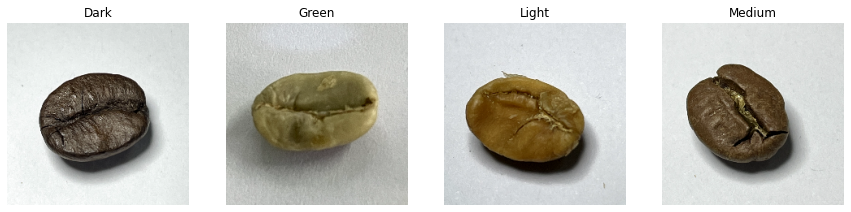

In [6]:
%%script echo skipping
plt.figure(figsize = (15,7))
plt.subplot(1,4,1)
dark_bean_image = view_random_image('/content/train/', "Dark")
plt.subplot(1,4,2)
green_bean_image = view_random_image('/content/train/', "Green")
plt.subplot(1,4,3)
light_bean_image = view_random_image('/content/train/', "Light")
plt.subplot(1,4,4)
medium_bean_image = view_random_image('/content/train/', "Medium")

Lets's see what the csv file contains

In [7]:
%%script echo skipping
df = pd.read_csv('/content/Coffee Bean.csv')
df.head()

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train


**From here you will have to continue on your own. Goodluck!**

In [3]:
!ls /content/train

ls: cannot access '/content/train': No such file or directory


In [11]:
from PIL import Image
from numpy import asarray

categories = {'Dark' : 0, 'Green' : 1, 'Light' : 2, "Medium" : 3}

Load the data

In [4]:
%%script echo skipping
train_images, train_labels, test_images, test_labels = [],[],[],[]

def load_images_with_label(directory, label):
  images, labels = [],[]
  for file_name in os.listdir(directory):
    image = Image.open(os.path.join(directory, file_name))
    # convert image to numpy array
    images.append(asarray(image))
    labels.append(label)
  return images, labels

for category in categories.keys():
  images, labels = load_images_with_label(os.path.join('/content/train/',category), categories[category])
  train_images += images
  train_labels += labels

for category in categories.keys():
  images, labels = load_images_with_label(os.path.join('/content/test/',category), categories[category])
  test_images += images
  test_labels += labels

convert data to numpy arrays

In [17]:
%%script echo skipping
print(train_images[0].shape)
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

(224, 224, 3)


normalize images

In [18]:
%%script echo skipping
train_images, test_images = train_images / 255.0, test_images / 255.0

## Part 2 - Models

###Base model

In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [71]:
%%script echo skipping
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [72]:
%%script echo skipping
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [73]:
%%script echo skipping
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 173056)           

define callbacks to create the best model:


*   save_best_model_weights: puts aside the best weights that were generated during the fit phase
*   early_stopping: stops the trainning after the accuracy for the validation model hasn't improved for X epochs



In [12]:
%%script echo skipping
best_weights_file = './best_weights.hdf5'
save_best_model_weights = tf.keras.callbacks.ModelCheckpoint(best_weights_file, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

In [75]:
%%script echo skipping
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.1, callbacks = [save_best_model_weights, early_stopping])

Epoch 1/10
33/34 [============================>.] - ETA: 0s - loss: 1.4041 - accuracy: 0.5341
Epoch 1: val_loss improved from inf to 1.28210, saving model to ./best_weights.hdf5
34/34 [==============================] - 3s 76ms/step - loss: 1.3856 - accuracy: 0.5389 - val_loss: 1.2821 - val_accuracy: 0.2500
Epoch 2/10
33/34 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.9119
Epoch 2: val_loss improved from 1.28210 to 0.17119, saving model to ./best_weights.hdf5
34/34 [==============================] - 2s 68ms/step - loss: 0.2354 - accuracy: 0.9139 - val_loss: 0.1712 - val_accuracy: 0.9417
Epoch 3/10
33/34 [============================>.] - ETA: 0s - loss: 0.1063 - accuracy: 0.9631
Epoch 3: val_loss did not improve from 0.17119
34/34 [==============================] - 2s 59ms/step - loss: 0.1043 - accuracy: 0.9639 - val_loss: 0.5616 - val_accuracy: 0.7917
Epoch 4/10
33/34 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9858
Epoch 4: val_lo

In [76]:
%%script echo skipping
model.load_weights(best_weights_file)
!rm "{best_weights_file}"

#### Base model graphs

In [6]:
def show_accuracy_graph(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train_acc', 'validation_acc'], loc='upper left')
  plt.show()

In [7]:
def show_loss_graph(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'validation_loss'], loc='upper left')
  plt.show()

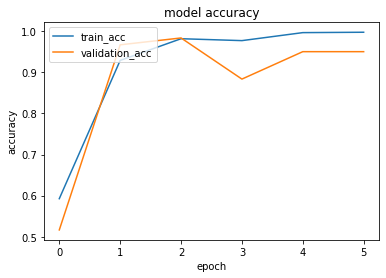

In [22]:
%%script echo skipping
show_accuracy_graph(history)

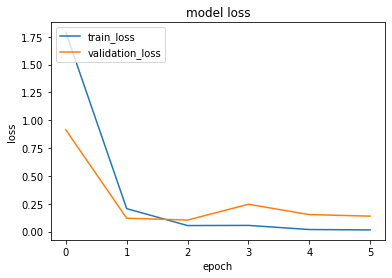

In [23]:
%%script echo skipping
show_loss_graph(history)

In [8]:
from sklearn.metrics import classification_report, accuracy_score

def make_predictions(model, test_images):
  test_predictions = []
  for prediction in model.predict(test_images):
    test_predictions.append(prediction.tolist().index(max(prediction)))
  return test_predictions

In [77]:
%%script echo skipping
test_predictions = make_predictions(model, test_images)
print(classification_report(test_predictions, test_labels, target_names=categories.keys()))

13/13 [==============================] - 0s 25ms/step
              precision    recall  f1-score   support

        Dark       0.99      0.98      0.99       101
       Green       1.00      1.00      1.00       100
       Light       1.00      0.99      1.00       101
      Medium       0.97      0.99      0.98        98

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [78]:
%%script echo skipping
print(accuracy_score(test_predictions, test_labels))

0.99


### experiment 1

In [69]:
%%script echo skipping
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
# added another conv2d layer
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [70]:
%%script echo skipping
model1.add(layers.Flatten())
# added another fully connected layer
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4))

In [71]:
%%script echo skipping
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 26, 26, 64)      

#### training experiment 1

In [72]:
%%script echo skipping
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

save_best_model_weights = tf.keras.callbacks.ModelCheckpoint(best_weights_file, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history1 = model1.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.1, callbacks = [save_best_model_weights, early_stopping])

Epoch 1/10
34/34 [==============================] - ETA: 0s - loss: 0.7790 - accuracy: 0.6833
Epoch 1: val_loss improved from inf to 0.77381, saving model to ./best_weights.hdf5
34/34 [==============================] - 3s 64ms/step - loss: 0.7790 - accuracy: 0.6833 - val_loss: 0.7738 - val_accuracy: 0.6417
Epoch 2/10
34/34 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9500
Epoch 2: val_loss improved from 0.77381 to 0.27172, saving model to ./best_weights.hdf5
34/34 [==============================] - 2s 58ms/step - loss: 0.1295 - accuracy: 0.9500 - val_loss: 0.2717 - val_accuracy: 0.9000
Epoch 3/10
34/34 [==============================] - ETA: 0s - loss: 0.0752 - accuracy: 0.9713
Epoch 3: val_loss did not improve from 0.27172
34/34 [==============================] - 2s 50ms/step - loss: 0.0752 - accuracy: 0.9713 - val_loss: 0.3370 - val_accuracy: 0.8583
Epoch 4/10
34/34 [==============================] - ETA: 0s - loss: 0.1926 - accuracy: 0.9380
Epoch 4: val_lo

In [73]:
%%script echo skipping
model1.load_weights(best_weights_file)
!rm "{best_weights_file}"

#### experiment 1 graphs

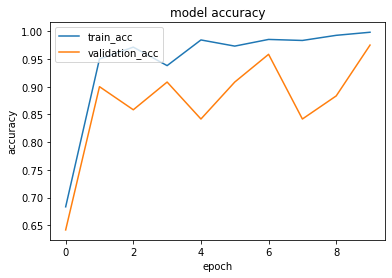

In [76]:
%%script echo skipping
show_accuracy_graph(history1)

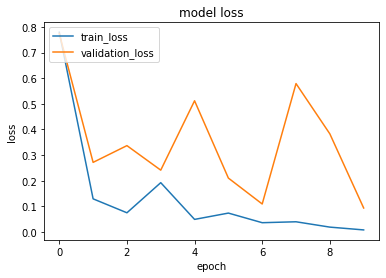

In [77]:
%%script echo skipping
show_loss_graph(history1)

In [74]:
%%script echo skipping
test_predictions = make_predictions(model1, test_images)
print(classification_report(test_predictions, test_labels, target_names=categories.keys()))

13/13 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

        Dark       1.00      0.98      0.99       102
       Green       1.00      1.00      1.00       100
       Light       0.99      1.00      0.99        99
      Medium       0.98      0.99      0.98        99

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [75]:
%%script echo skipping
print(accuracy_score(test_predictions, test_labels))

0.9925


### experiment 2

In [36]:
%%script echo skipping
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [37]:
%%script echo skipping
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4))

In [38]:
%%script echo skipping
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 173056)           

#### learning rate callbacks

In [6]:
from keras.callbacks import LearningRateScheduler

a linear learning rate callback.

every epoch the learning rate is set to be equal to 0.85 of its current value

In [40]:
%%script echo skipping
def linear_scheduler(epoch, learning_rate):
  decay_rate = 0.85
  return learning_rate * decay_rate

In [41]:
%%script echo skipping
def non_linear_scheduler(epoch, learning_rate):
  decay_rate = 0.9
  return learning_rate * pow(decay_rate, epoch)

#### training experiment 2

In [42]:
%%script echo skipping
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

save_best_model_weights = tf.keras.callbacks.ModelCheckpoint(best_weights_file, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history2 = model2.fit(train_images, train_labels, epochs=10, 
                    validation_split=0.1, callbacks = [save_best_model_weights, early_stopping, LearningRateScheduler(linear_scheduler, verbose=1)])


Epoch 1: LearningRateScheduler setting learning rate to 0.0008500000403728336.
Epoch 1/10
33/34 [============================>.] - ETA: 0s - loss: 1.4889 - accuracy: 0.5038
Epoch 1: val_loss improved from inf to 1.48195, saving model to ./best_weights.hdf5
34/34 [==============================] - 3s 74ms/step - loss: 1.4717 - accuracy: 0.5083 - val_loss: 1.4819 - val_accuracy: 0.0417 - lr: 8.5000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0007225000590551645.
Epoch 2/10
33/34 [============================>.] - ETA: 0s - loss: 0.2913 - accuracy: 0.8845
Epoch 2: val_loss improved from 1.48195 to 0.62445, saving model to ./best_weights.hdf5
34/34 [==============================] - 2s 69ms/step - loss: 0.2878 - accuracy: 0.8861 - val_loss: 0.6244 - val_accuracy: 0.6750 - lr: 7.2250e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0006141250254586339.
Epoch 3/10
33/34 [============================>.] - ETA: 0s - loss: 0.1354 - accuracy: 0.9517
Epoch 3: val

In [43]:
%%script echo skipping
model2.load_weights(best_weights_file)
!rm "{best_weights_file}"

#### experiment 2 graphs

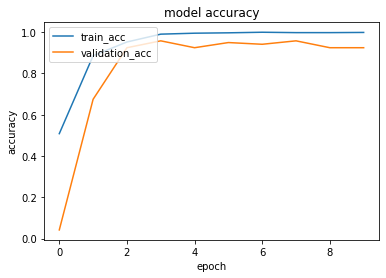

In [44]:
%%script echo skipping
show_accuracy_graph(history2)

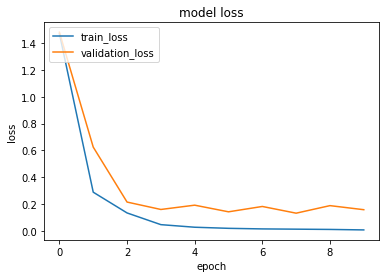

In [45]:
%%script echo skipping
show_loss_graph(history2)

In [46]:
%%script echo skipping
test_predictions = make_predictions(model2, test_images)
print(classification_report(test_predictions, test_labels, target_names=categories.keys()))

13/13 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

        Dark       1.00      1.00      1.00       100
       Green       1.00      1.00      1.00       100
       Light       1.00      0.99      1.00       101
      Medium       0.99      1.00      0.99        99

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [47]:
%%script echo skipping
print(accuracy_score(test_predictions, test_labels))

0.9975


### save model

In [48]:
%%script echo skipping
from google.colab import drive
drive.mount('/content/gdrive')

skipping


In [49]:
%%script echo skipping
model2.save('/content/final_model')
!cd /content && zip -r ./final_model.zip ./final_model
!mv /content/final_model.zip /content/gdrive/MyDrive/final_model.zip
!rm -rf /content/final_model

  adding: final_model/ (stored 0%)
  adding: final_model/saved_model.pb (deflated 89%)
  adding: final_model/variables/ (stored 0%)
  adding: final_model/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: final_model/variables/variables.index (deflated 67%)
  adding: final_model/assets/ (stored 0%)
  adding: final_model/keras_metadata.pb (deflated 91%)
mv: cannot move '/content/final_model.zip' to '/content/gdrive/MyDrive/final_model.zip': No such file or directory


## Part 3 - Testing environment

In [50]:
%%script echo skipping
!rm -rf /content/content
!rm -rf /content/final_model
!rm /content/final_model.zip

skipping


In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 13QE3Vd_FZF1iasQmtym6CCwHzS7sFI8H
!gdown 1-e1BfXYoASsC_5F_vkt3saSx4J4Xzu6E
!unzip final_model.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=13QE3Vd_FZF1iasQmtym6CCwHzS7sFI8H
To: /content/explainer.md
100% 1.52k/1.52k [00:00<00:00, 2.86MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-e1BfXYoASsC_5F_vkt3saSx4J4Xzu6E
To: /content/final_model.zip
100% 111M/111M [00:02<00:00, 38.6MB/s]
Archive:  final_model.zip
   creating: final_model/
   creating: final_model/variables/
  inflating: final_model/variables/variables.index  
  inflating: final_model/variables/variables.data-00000-of-00001  
  inflating: final_model/saved_model.pb  
   creating: final_model/assets/
  inflating: final_model/keras_metadata.pb  


In [8]:
loaded_model = models.load_model('/content/final_model')

In [9]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving light.png to light.png
Saving dark.png to dark.png
User uploaded file "light.png" with length 95237 bytes
User uploaded file "dark.png" with length 94561 bytes


###predict

Make sure that the images are of the correct size.

Then, make a prediction for every image

In [14]:
for file_name in uploaded.keys():
  image = asarray(Image.open(file_name)) / 255.0
  assert image.shape == (224, 224, 3), f'the image {file_name} is of the wrong size'
  prediction_values = loaded_model.predict(np.expand_dims(image,axis=0)).tolist()[0]
  my_prediction = prediction_values.index(max(prediction_values))
  
  for key in categories.keys():
    if categories[key] == my_prediction:
      my_prediction = key
      break
  print(f'prediction for {file_name} is {my_prediction}')

1/1 [==============================] - 7s 7s/step
prediction for light.png is Light
1/1 [==============================] - 0s 22ms/step
prediction for dark.png is Dark
